<a href="https://colab.research.google.com/github/AhmadHakeem03/Machine-Learning-Classification-/blob/main/HelloWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ahmad Saleh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Clean data
df.dropna(inplace = True, axis = 0)
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47592 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47592 non-null  int64 
 1   workclass       47592 non-null  object
 2   fnlwgt          47592 non-null  int64 
 3   education       47592 non-null  object
 4   education-num   47592 non-null  int64 
 5   marital-status  47592 non-null  object
 6   occupation      47592 non-null  object
 7   relationship    47592 non-null  object
 8   race            47592 non-null  object
 9   sex             47592 non-null  object
 10  capital-gain    47592 non-null  int64 
 11  capital-loss    47592 non-null  int64 
 12  hours-per-week  47592 non-null  int64 
 13  native-country  47592 non-null  object
 14  income          47592 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
# Selecting features
numerical_columns = [feature for feature in df.columns if df[feature].dtypes != 'object']

In [ ]:
x = df[numerical_columns]
x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [ ]:
# Preprocessing
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

y = df['income'].value_counts()
print(y)

income
<=50K    36053
>50K     11539
Name: count, dtype: int64


In [ ]:
y = df["income"]
v_counts = pd.value_counts(y)
print(v_counts)

income
<=50K    36053
>50K     11539
Name: count, dtype: int64


<ipython-input-13-b65ebdadf10e>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  v_counts = pd.value_counts(y)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# Preprocessing
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## First test model (Logistic Regression)

In [ ]:
lr = LogisticRegression(multi_class = 'ovr')
lr.fit(x_train_scaled, y_train)
y_hat_lr = lr.predict(x_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
acc = accuracy_score(y_test, y_hat_lr)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_lr)
print(report)

Model accuracy was 81.43%
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89     10833
        >50K       0.70      0.40      0.51      3445

    accuracy                           0.81     14278
   macro avg       0.77      0.67      0.70     14278
weighted avg       0.80      0.81      0.80     14278



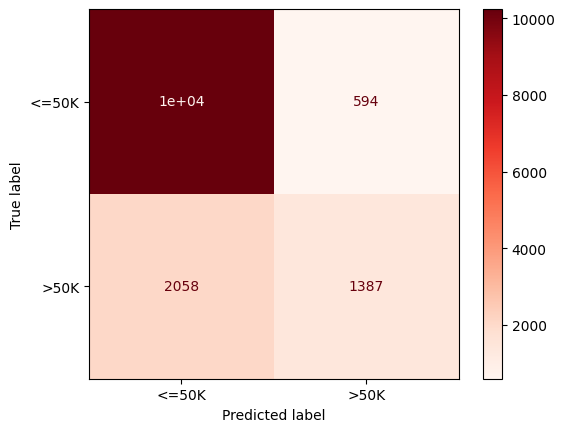

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_lr, cmap=plt.cm.Reds)
plt.show()

## Second test model (Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 10)
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
y_hat_dt = dt.predict(x_test_scaled)
acc = accuracy_score(y_test, y_hat_dt)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_dt)
print(report)

Model accuracy was 83.03%
              precision    recall  f1-score   support

       <=50K       0.84      0.96      0.90     10775
        >50K       0.79      0.42      0.55      3503

    accuracy                           0.83     14278
   macro avg       0.81      0.69      0.72     14278
weighted avg       0.82      0.83      0.81     14278



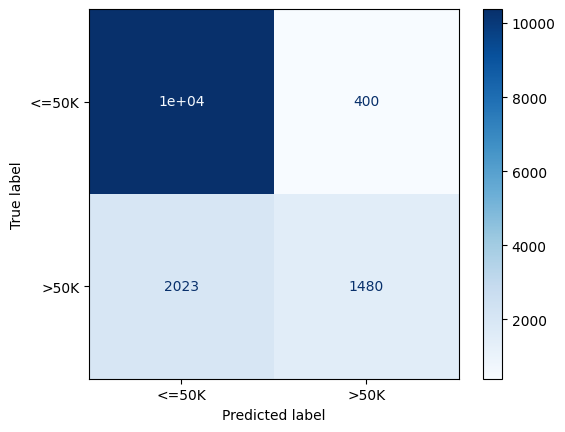

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_dt, cmap=plt.cm.Blues)
plt.show()

## Third test model (Neural Networks)

In [ ]:
from sklearn.preprocessing import LabelEncoder

x_valid, x_train = x_test_scaled[:5000] , x_test_scaled[5000:]
y_valid, y_train = y_test[:5000], y_test[5000:]

le = LabelEncoder()

y_train = le.fit_transform(y_train)  # This converts strings to 0 and 1
print(y_train)
y_test = le.transform(y_test)

[0 0 0 ... 0 0 0]


In [ ]:
import tensorflow as tf
input_shape = x_train.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_dim=input_shape),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7529 - loss: 0.5851 - val_accuracy: 0.7752 - val_loss: 0.4604
Epoch 2/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7894 - loss: 0.4437 - val_accuracy: 0.8052 - val_loss: 0.4218
Epoch 3/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8117 - loss: 0.4179 - val_accuracy: 0.8100 - val_loss: 0.4093
Epoch 4/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8232 - loss: 0.4010 - val_accuracy: 0.8110 - val_loss: 0.4035
Epoch 5/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8192 - loss: 0.4017 - val_accuracy: 0.8112 - val_loss: 0.4007
Epoch 6/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8204 - loss: 0.3948 - val_accuracy: 0.8126 - val_loss: 0.3973
Epoch 7/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8241 - loss: 0.3914 - val_accuracy: 0.8154 - val_loss: 0.3950
Epoch 8/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8194 - loss: 0.3933 - val_accuracy: 0.

In [ ]:
# Evaluate Accuracy
_, acc = model.evaluate(x_test, y_test)
print(f'Neural Network Accuracy: {acc:.2f}')

_, acc = model.evaluate(x_train, y_train)
print(f'Neural Network Accuracy: {acc:.2f}')

447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7888 - loss: 2023.7168
Neural Network Accuracy: 0.79
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.3727
Neural Network Accuracy: 0.83
